**Scikit-learn is a popular Machine Learning library for Python. In this kernel we will build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not. **

In [79]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')

In [3]:
#Load the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

We have 768 rows and 9 columns. The first 8 columns represent the predictor variables/features and the last column represent the target variable

In [6]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known Output values (labels).

Use Scikit-learn's "train_test_split" method to split data into train and test sets. 

It is a best practice to perform our split so that it reflects the labels in the data. We want labels to be split into train and test set reflecting how they are in the original dataset.  The stratify argument/parameter in "train_test_split" method should be used.

we create a test set of size of about 30% of the dataset.

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

Let's create a classifier using k-Nearest Neighbors algorithm.

First let us first observe the accuracies for different values of k.

In [59]:
#use sklearn KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for indx,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[indx] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[indx] = knn.score(X_test, y_test) 

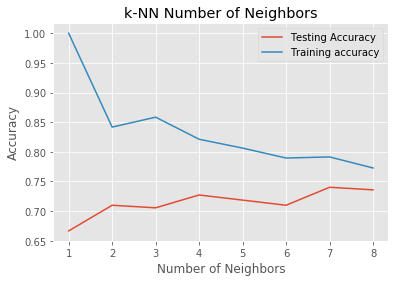

In [60]:
#Generate plot
plt.title('k-NN Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Observe above that we get maximum testing accuracy for k=7, K=8 is close but a little less acurate. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [61]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [62]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [63]:
#Get accuracy.
knn.score(X_test,y_test)

0.7402597402597403

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Use Scikit-learn's "confusion_matrix" method to calculate the confusion matrix.

In [64]:
#let's get the predictions using the classifier we fit above
y_pred = knn.predict(X_test)

In [66]:
#Use confusion_matrix
confusion_matrix(y_test,y_pred)

array([[129,  21],
       [ 39,  42]], dtype=int64)

Considering confusion matrix above:

True negative = 129

False positive = 21

True postive = 42

Fasle negative = 39

Confusion matrix can also be obtained using crosstab method of pandas.

In [67]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,129,21,150
1,39,42,81
All,168,63,231


**Classification Report**

Another important report is the Classification report. It is a text summary of the precision, F1 score for each class. Use Scikit-learn's "classification_report" method to calculate the Classification report

In [71]:
#Use classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



**ROC (Reciever Operating Charecteristic) curve**

A Receiver Operating Characteristic (ROC) Curve is a way to compare diagnostic tests. It is a plot of the true positive rate (tpr) against the false positive rate (fpr).

A ROC plot shows:

1) The relationship between sensitivity and specificity. For example, a decrease in sensitivity results in an increase in specificity.

2) The closer the graph is to the top and left-hand borders, the more accurate the test.

3) The closer the graph to the diagonal, the less accurate the test.

4) The likelihood ratio; given by the derivative at any particular cutpoint.

5) Test accuracy is also shown as the area under the curve, greater the area the more accurate the test.


In [72]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

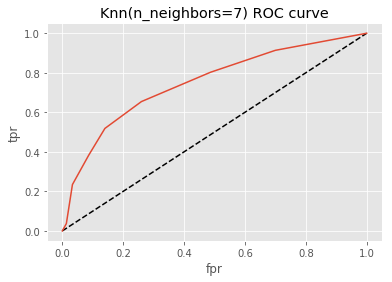

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [78]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.7490123456790124

**Cross Validation**

The model's performance is dependent on way the data is split. Cross Validation is used for assessing how the results of a model will generalize to other data sets.


In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. A single subsample is retained as the validation data for testing the model; the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (k folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can be averaged to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

**Hyperparameter tuning**

Scikit-learn provides a simple way of achieving this using GridSearchCV (Grid Search cross-validation).


In [80]:
#Use GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [90]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
knn_cv.best_score_

0.7578125

In [92]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 about 76%